In [13]:
## last edited: 5/27/22
## Status: Fixed path names to match new directory structure. 
##         Makes pretty simple cartopy plots of flight paths

import os
import datetime 
import warnings

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.feature as cfeature
 
os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots

In [14]:
# testing scripts for loading data
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"
tdr_path = "/Users/etmu9498/research/data/tdr/sam/nc-files"

tdr_list = make_plots.load_tdr( tdr_path, print_files=False)
crl_list = make_plots.load_crl( crl_path, print_files=True)

os.chdir( crl_path)

crl data files:
0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) P3_20210813H1_091801-113558.cdf
4) P3_20210816H1_085245-123459.cdf
5) P3_20210816H1_090000-102359.cdf
6) P3_20210817H1_094204-132058.cdf
7) P3_20210818H1_211425-244159.cdf
8) P3_20210819H1_213003-244159.cdf
9) P3_20210820H1_212402-245958.cdf
10) P3_20210821H2_213903-225658.cdf
11) P3_20210821H2_213903-262058.cdf
12) P3_20210827H1_203112-275220.cdf
13) P3_20210828H1_200115-221321.cdf
14) P3_20210829H1_171201-223719.cdf
15) P3_20210925H1_211201-243558.cdf
16) P3_20210926H1_220900-255058.cdf
17) P3_20210927H1_213003-253558.cdf
18) P3_20210929H2_211201-261159.cdf


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\etmu9498\\research\\code\\scripts\\P3_20210811H1_200000-224759.cdf'

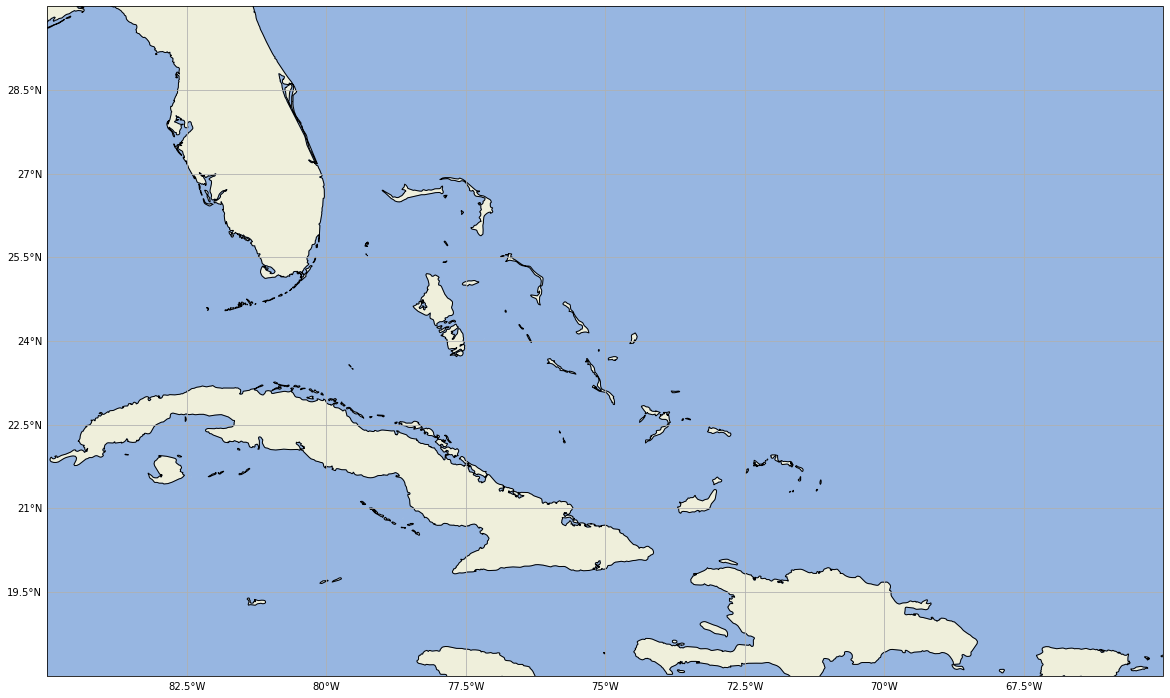

In [3]:
# crl flight path figure Fred

def main():
    fig = plt.figure( figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.set_extent([-85, -65, 18, 30], crs=ccrs.PlateCarree())

    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    colors = ['b', 'k', 'g', 'w']
    
    crl_data1 = xr.open_dataset( crl_list[0])
    crl_data2 = xr.open_dataset( crl_list[1])
    crl_data3 = xr.open_dataset( crl_list[2])
    crl_data4 = xr.open_dataset( crl_list[3])

    for i in range(4):    
        os.chdir( crl_path)
        crl_data = xr.open_dataset( crl_list[ i])
        lat = crl_data.Lat 
        lon = crl_data.Lon 
        track = sgeom.LineString(zip(lon, lat))
        ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none', edgecolor=colors[i])                          
    
    r = [ 
        mpatches.Rectangle((0, 0), 1, 1, facecolor="b"), mpatches.Rectangle((0, 0), 1, 1, facecolor="k"),
        mpatches.Rectangle((0, 0), 1, 1, facecolor="g"), mpatches.Rectangle((0, 0), 1, 1, facecolor="w") ]
    
    
    labels = ['flight 8/11', 'flight 8/12 part 1', 'flight 8/12 part 2', 'flight 8/13']
    ax.legend( r, labels)
    
    ax.set_title( "Flight Patterns for CRL Data Collection, Tropical Storm Fred")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

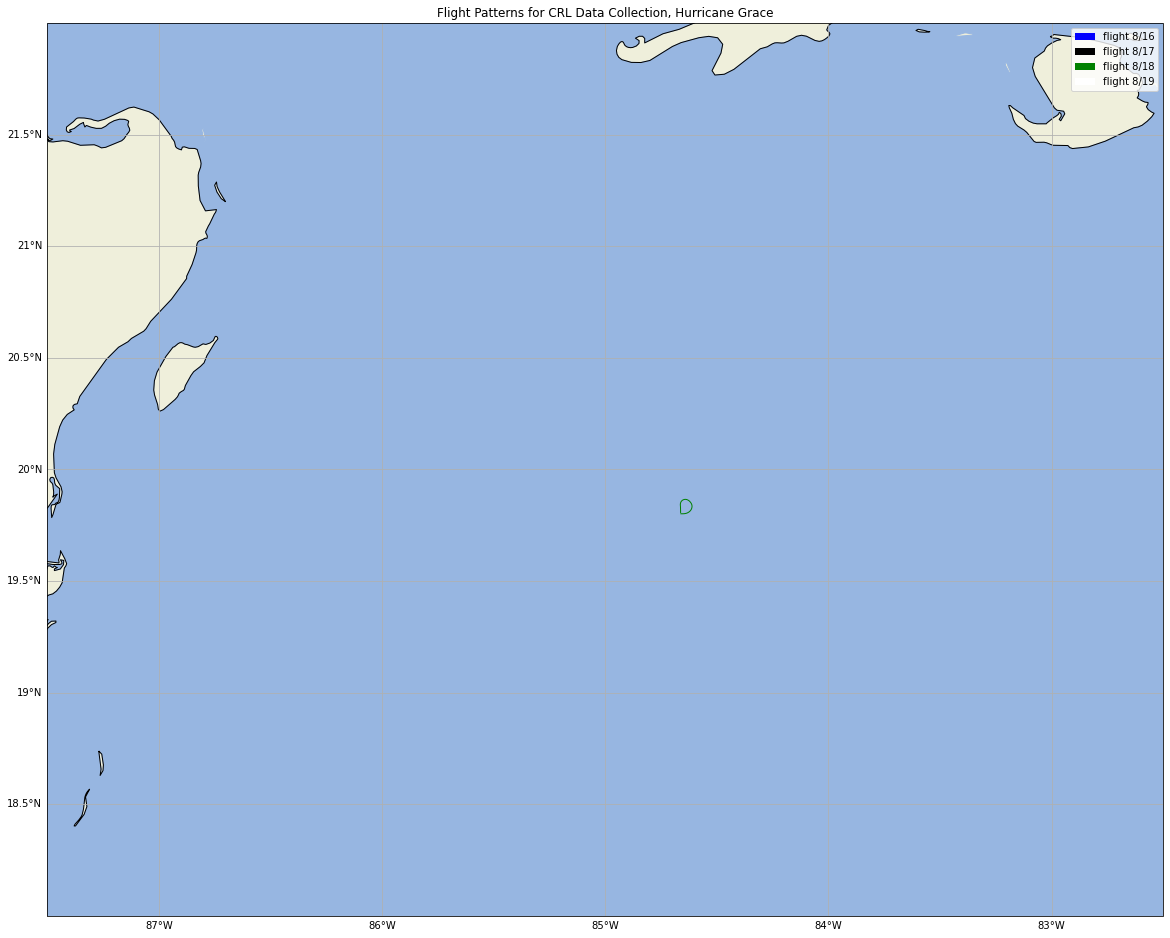

In [12]:
# crl flight path figure Grace

def main():
    fig = plt.figure( figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # ax.set_extent([-90, -70, 12, 25], crs=ccrs.PlateCarree())
    ax.set_extent([-87.5, -82.5, 18, 22], crs=ccrs.PlateCarree())
    
    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    colors = ['b', 'k', 'g', 'w']
    # plot all three flight paths
    os.chdir( crl_path)
    
    crl_data16 = xr.open_dataset( crl_list[4])
    crl_data17 = xr.open_dataset( crl_list[6])
    crl_data18 = xr.open_dataset( crl_list[7])
    crl_data19 = xr.open_dataset( crl_list[8])

    lat16 = crl_data16.Lat[5000:6600]
    lon16 = crl_data16.Lon[5000:6600]    
    
    lat17 = crl_data17.Lat
    lon17 = crl_data17.Lon    
   
    lat18 = crl_data18.Lat[3570:3655]
    lon18 = crl_data18.Lon[3570:3655]   
    
    '''
    lat19 = crl_data19.Lat
    lon19 = crl_data19.Lon    
    
    
    track16 = sgeom.LineString(zip(lon16, lat16))
    ax.add_geometries([track16], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[0])                          

    track17 = sgeom.LineString(zip(lon17, lat17))
    ax.add_geometries([track17], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[1])                          

    '''
    track18 = sgeom.LineString(zip(lon18, lat18))
    ax.add_geometries([track18], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[2])                          

    '''
    track19 = sgeom.LineString(zip(lon19, lat19))
    ax.add_geometries([track19], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[3])                          
    '''
    
    r = [ 
        mpatches.Rectangle((0, 0), 1, 1, facecolor="b"), mpatches.Rectangle((0, 0), 1, 1, facecolor="k"),
        mpatches.Rectangle((0, 0), 1, 1, facecolor="g"), mpatches.Rectangle((0, 0), 1, 1, facecolor="w") ]
    
    
    labels = ['flight 8/16', 'flight 8/17', 'flight 8/18', 'flight 8/19']
    ax.legend( r, labels)
    
    ax.set_title( "Flight Patterns for CRL Data Collection, Hurricane Grace")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

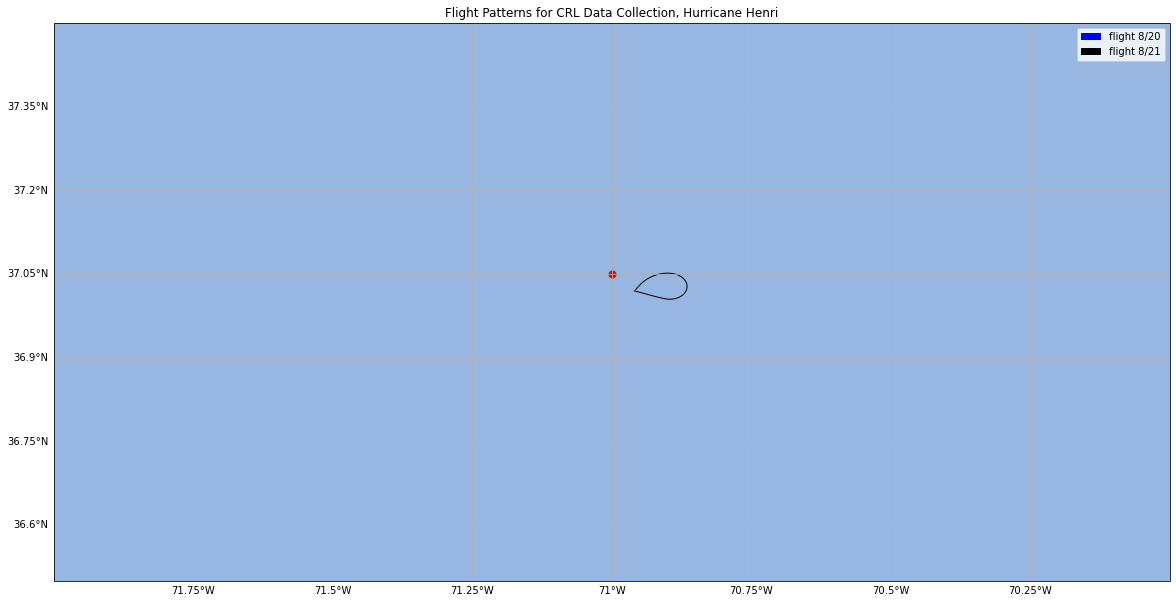

In [16]:
# crl flight path figure Henri

def main():
    fig = plt.figure( figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # ax.set_extent([-80, -60, 25, 45], crs=ccrs.PlateCarree())

    # zoom in on 8/21 spiral
    ax.set_extent([-72, -70, 36.5, 37.5], crs=ccrs.PlateCarree())

    
    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    colors = ['b', 'k', 'g', 'w']
    # plot all three flight paths
    os.chdir( crl_path)
    
    crl_data20 = xr.open_dataset( crl_list[9])
    crl_data21 = xr.open_dataset( crl_list[11])

    lat20 = crl_data20.Lat[5000:6100]
    lon20 = crl_data20.Lon[5000:6100]   
    
    lat21 = crl_data21.Lat[1565:1650] # [6700: 8100]
    lon21 = crl_data21.Lon[1565:1650] # 6700: 8100]    
    
    
    track20 = sgeom.LineString(zip(lon20, lat20))
    ax.add_geometries([track20], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[0])                          

    track21 = sgeom.LineString(zip(lon21, lat21))
    ax.add_geometries([track21], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[1])                          
    
    r = [mpatches.Rectangle((0, 0), 1, 1, facecolor="b"), mpatches.Rectangle((0, 0), 1, 1, facecolor="k")]    
    
    labels = [ 'flight 8/20', 'flight 8/21']
    ax.legend( r, labels)
    
    ax.scatter( -71, 37.05, s=50, c='r')
    
    ax.set_title( "Flight Patterns for CRL Data Collection, Hurricane Henri")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

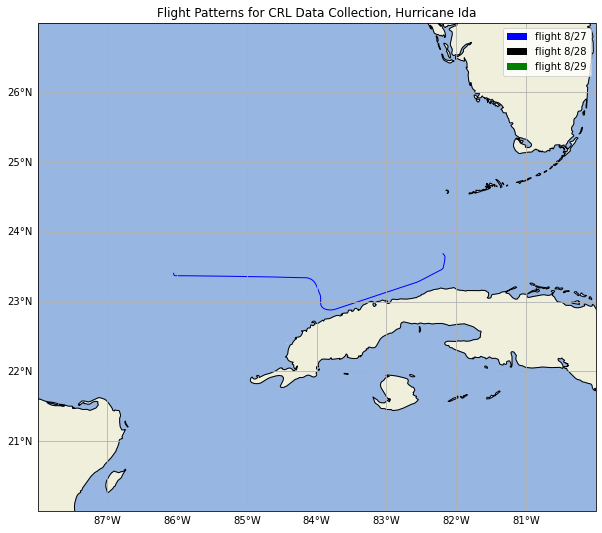

In [66]:
# crl flight path figure Ida

def main():
    fig = plt.figure( figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # all three flights
    # ax.set_extent([-95, -45, 10, 32], crs=ccrs.PlateCarree())
    # two best flights
    ax.set_extent([-95, -80, 20, 32], crs=ccrs.PlateCarree())

    ax.set_extent([-88, -80, 20, 27], crs=ccrs.PlateCarree())

    
    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    imin = 10200
    imax = 12000 # 13213
    
    colors = ['b', 'k', 'g']
    # plot all three flight paths
    for i in range(3):    
        os.chdir( crl_path)
        crl_data = xr.open_dataset( crl_list[i+12])
        lat = crl_data.Lat [ imin: imax]
        lon = crl_data.Lon [ imin: imax]    
        track = sgeom.LineString(zip(lon, lat))
        ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none', edgecolor=colors[i])                          

    sam26 = mpatches.Rectangle((0, 0), 1, 1, facecolor="b")
    sam27 = mpatches.Rectangle((0, 0), 1, 1, facecolor="k")
    sam29 = mpatches.Rectangle((0, 0), 1, 1, facecolor="g") 
    labels = ['flight 8/27', 'flight 8/28', 'flight 8/29']
    ax.legend([sam26, sam27, sam29], labels)
    
    ax.set_title( "Flight Patterns for CRL Data Collection, Hurricane Ida")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

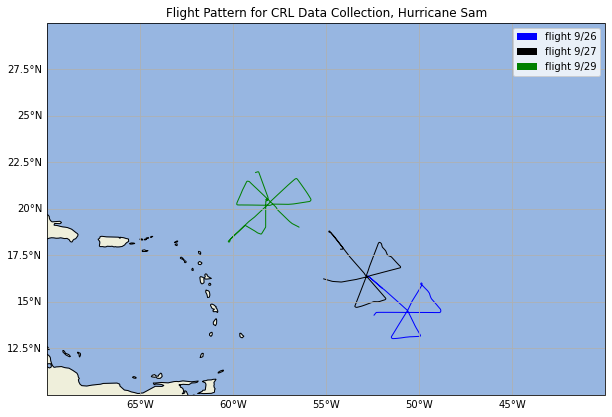

In [6]:
# crl flight path figure Sam

def main():
    fig = plt.figure( figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # zoomed out   
    # ax.set_extent([-80, -40, 10, 40], crs=ccrs.PlateCarree())
    # zoomed in
    ax.set_extent([-70, -40, 10, 30], crs=ccrs.PlateCarree())

    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    colors = ['b', 'k', 'g']
    # plot all three flight paths
    for i in range(3):    
        os.chdir( crl_path)
        crl_data = xr.open_dataset( crl_list[i+16])
        lat = crl_data.Lat
        lon = crl_data.Lon    
        track = sgeom.LineString(zip(lon, lat))
        ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none', edgecolor=colors[i])                          

    sam26 = mpatches.Rectangle((0, 0), 1, 1, facecolor="b")
    sam27 = mpatches.Rectangle((0, 0), 1, 1, facecolor="k")
    sam29 = mpatches.Rectangle((0, 0), 1, 1, facecolor="g") 
    labels = ['flight 9/26', 'flight 9/27', 'flight 9/29']
    ax.legend([sam26, sam27, sam29], labels)
    
    ax.set_title( "Flight Pattern for CRL Data Collection, Hurricane Sam")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()